MNIST ("Modified National Institute of Standards and Technology") classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from itertools import product

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import visualkeras 

import warnings
warnings.filterwarnings("ignore")

In [12]:
X_train = pd.read_csv('dataset/train/train.csv')
X_test = pd.read_csv('dataset/test/test.csv')

In [13]:
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
# Missing Data
X_train.isnull().sum().sum()

0

In [18]:
X_test.isnull().sum().sum()

0

In [19]:
y_train = X_train['label']
X_train = X_train.drop(['label'], axis=1)

In [22]:
pd.Series(y_train).value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [23]:
len(set(y_train))

10

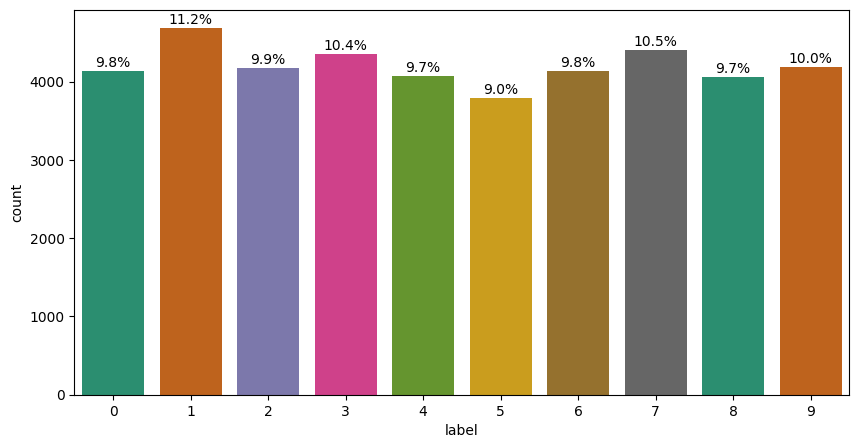

In [24]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = y_train, palette = 'Dark2')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [26]:
X_train.shape, X_test.shape

((42000, 784), (28000, 784))

In [27]:
#Reshaping into (28x28x1)

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

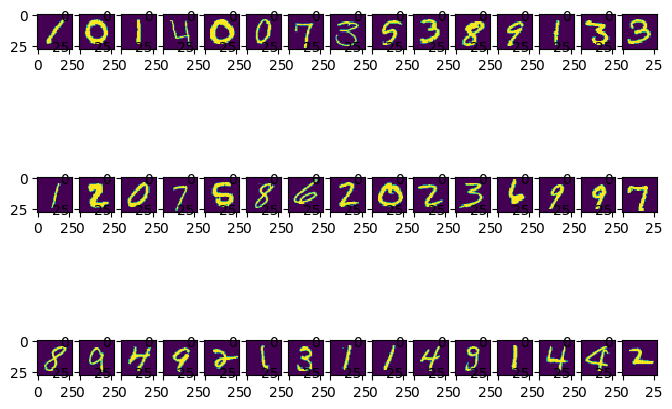

In [30]:
plt.figure(figsize=(8,6))
x, y = 15, 3
for i in range(45):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i],interpolation='nearest')
plt.show()

In [31]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [33]:
K = len(set(y_train))

In [34]:
y_categ_train = to_categorical(y_train,K)

In [35]:
y_train.head(1)

0    1
Name: label, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_categ_train, test_size = 0.1, random_state=42)

In [49]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)) 
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [50]:
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


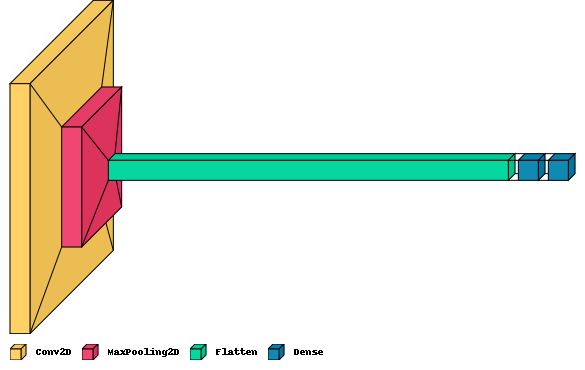

In [51]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [54]:
model.fit(X_train1,y_train1,validation_data = (X_val,y_val),epochs=10)

Epoch 1/10
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0532 - val_accuracy: 0.9838
Epoch 2/10
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0458 - val_accuracy: 0.9852
Epoch 3/10
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0483 - val_accuracy: 0.9871
Epoch 4/10
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0475 - val_accuracy: 0.9871
Epoch 5/10
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0491 - val_accuracy: 0.9876
Epoch 6/10
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0455 - val_accuracy: 0.9895
Epoch 7/10
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0551 -

In [58]:
score = model.evaluate(X_val, y_val, verbose = 10 )
print ( 'Loss is :', score[0]*100, '\nTraining Accuracy is :', score[1]*100 )

Loss is : 7.956186681985855 
Training Accuracy is : 98.4761893749237


In [56]:
predict_y=model.predict(X_val)
y_val_hat=np.argmax(predict_y,axis=1)
y_val_org = np.argmax(y_val, axis = 1)

132/132 [==============================] - 0s 3ms/step


In [59]:
layers = model.layers
filters, biases = model.layers[0].get_weights()
layer_outputs = model.layers[0].output
model_Input = model.input
print('Layer Name is :', layers[0].name, '\nFitler Shaper:',filters.shape)

Layer Name is : conv2d_2 
Fitler Shaper: (4, 4, 1, 32)


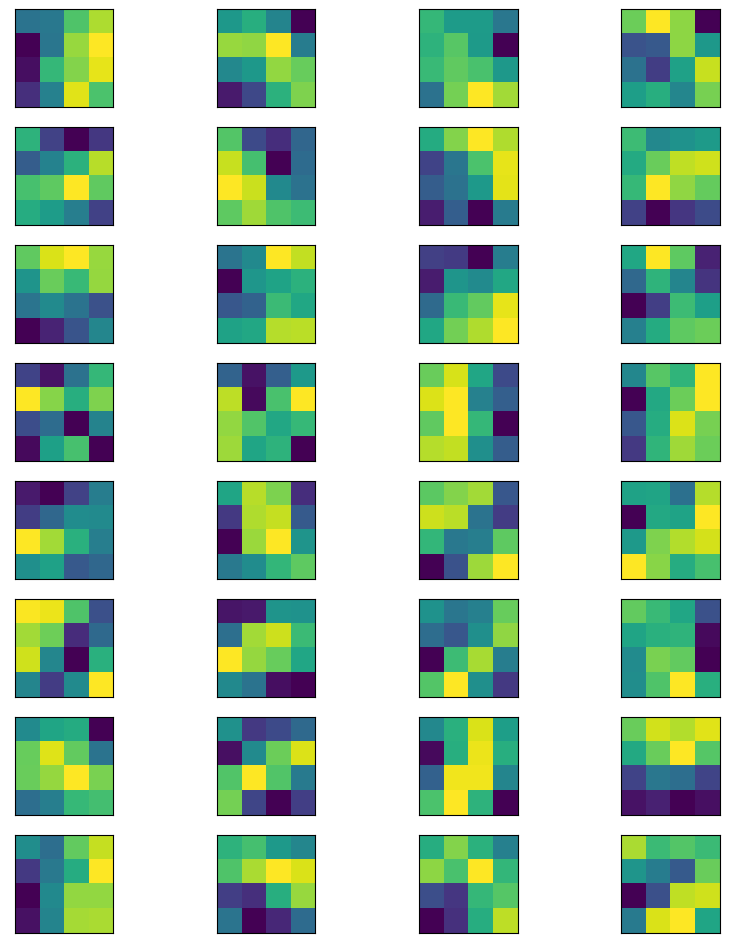

In [61]:
f = plt.figure(figsize = (10,12))
columns = 4
rows = 8
n_filters = columns * rows
for i in range(1, n_filters + 1):
    fil = filters[:,:,:,i-1]
    f = plt.subplot(rows, columns, i)
    f.set_xticks([])
    f.set_yticks([])
    plt.imshow(fil[: ,: ,0])

plt.show()

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

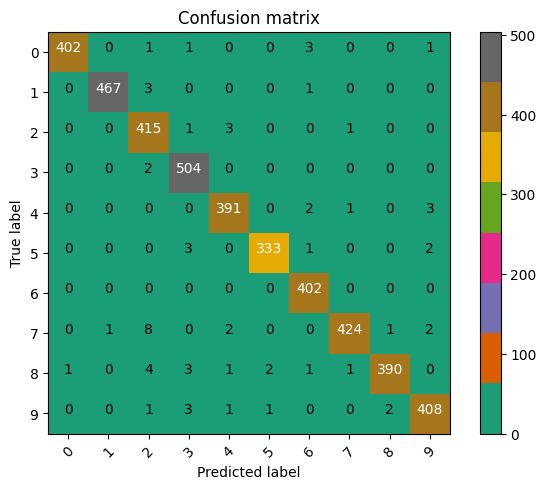

In [63]:
confusion_mtx = confusion_matrix(y_val_org, y_val_hat) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [64]:
print(classification_report(y_val_org,y_val_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       1.00      0.99      0.99       471
           2       0.96      0.99      0.97       420
           3       0.98      1.00      0.99       506
           4       0.98      0.98      0.98       397
           5       0.99      0.98      0.99       339
           6       0.98      1.00      0.99       402
           7       0.99      0.97      0.98       438
           8       0.99      0.97      0.98       403
           9       0.98      0.98      0.98       416

    accuracy                           0.98      4200
   macro avg       0.99      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



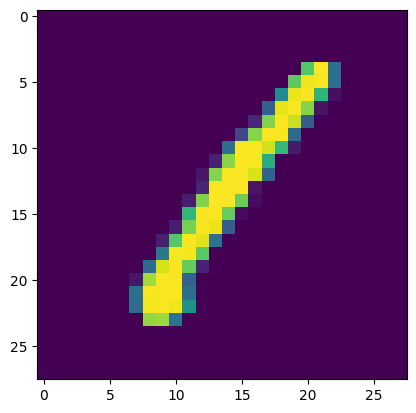

In [66]:
test_im = X_train[0]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')